In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel

In [2]:
#create a directed stochastic block model
n = 100
p = 0.5
q = 0.5
#3 x 3 block model
F = [[0.5,1.0,1.0,1.0],
     [0.0,0.5,1.0,0.5],
     [0.0,0.0,0.5,1.0],
     [0.0,0.5,0.0,0.5]]
dsbm = DirectedStochasticBlockModel(k=4, N=n, p=p, q=q, F=F)
A = dsbm.adjacency_matrix

<AxesSubplot: >

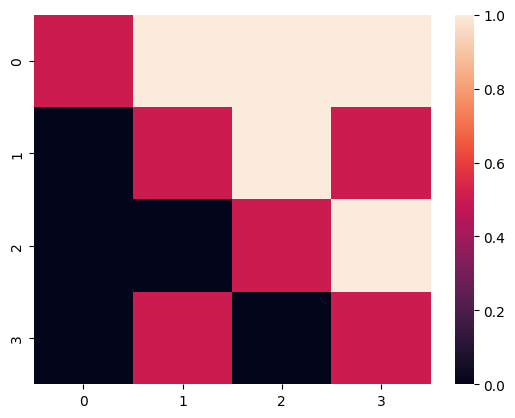

In [3]:
sns.heatmap(F)

In [9]:
#normalizing A first
D_inv = np.zeros(A.shape)
np.fill_diagonal(D_inv,[1/np.sqrt(d) for d in np.sum(A, axis=1) if d != 0])
A_normalized = D_inv @ A @ D_inv

#Taking symmetric and skew-symmetric parts
A_skew = A_normalized - A_normalized.T
A_sym = A_normalized + A_normalized.T

# taking largest eigenvector of A_sym
eig_vals_sym, eig_vecs_sym = np.linalg.eig(A_sym)
idx = np.abs(eig_vals_sym).argsort()[::-1]
eig_vec_sym_first = eig_vecs_sym[:,idx][:,0:2]

# taking largest eigenvector of A_skew
eig_vals_skew, eig_vecs_skew = np.linalg.eig(A_skew)
idx = np.abs(eig_vals_skew).argsort()[::-1]
eig_vec_skew_first = eig_vecs_skew[:,idx][:,0:2]

# concatenating the real and imaginary parts of the eigenvectors to get 4 vectors of length n
eig_vecs = np.concatenate((np.real(eig_vec_sym_first),np.imag(eig_vec_sym_first),np.real(eig_vec_skew_first),np.imag(eig_vec_skew_first)),axis=1)

# clustering the eigen vectors by kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, n_init=100).fit(eig_vecs)
clusters = kmeans.labels_

#computing ARI
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(dsbm.correct_clusters, clusters))




0.6323612499456734


In [8]:
# using zanetti clustering
from clustering_algorithms.zanetti_clustering import DSBM_Clustering_Zanetti
clusters_zanetti, eig_vecs_projected = DSBM_Clustering_Zanetti(A,4,2,method='adjacency',normalize=True)
print(adjusted_rand_score(dsbm.correct_clusters, clusters_zanetti))

0.97305763367046


In [10]:
#repeating experiment above but with more noise on F
F = [[0.5,0.8,0.8,0.8],
     [0.2,0.5,0.8,0.5],
     [0.2,0.2,0.5,0.8],
     [0.2,0.5,0.2,0.5]]
dsbm = DirectedStochasticBlockModel(k=4, N=n, p=p, q=q, F=F)
A = dsbm.adjacency_matrix
D_inv = np.zeros(A.shape)
np.fill_diagonal(D_inv,[1/np.sqrt(d) for d in np.sum(A, axis=1) if d != 0])
A_normalized = D_inv @ A @ D_inv

#Taking symmetric and skew-symmetric parts
A_skew = A_normalized - A_normalized.T
A_sym = A_normalized + A_normalized.T

# taking largest eigenvector of A_sym
eig_vals_sym, eig_vecs_sym = np.linalg.eig(A_sym)
idx = np.abs(eig_vals_sym).argsort()[::-1]
eig_vec_sym_first = eig_vecs_sym[:,idx][:,0:2]

# taking largest eigenvector of A_skew
eig_vals_skew, eig_vecs_skew = np.linalg.eig(A_skew)
idx = np.abs(eig_vals_skew).argsort()[::-1]
eig_vec_skew_first = eig_vecs_skew[:,idx][:,0:2]

# concatenating the real and imaginary parts of the eigenvectors to get 4 vectors of length n
eig_vecs = np.concatenate((np.real(eig_vec_sym_first),np.imag(eig_vec_sym_first),np.real(eig_vec_skew_first),np.imag(eig_vec_skew_first)),axis=1)

# clustering the eigen vectors by kmeans
kmeans = KMeans(n_clusters = 4, n_init=100).fit(eig_vecs)
clusters = kmeans.labels_

#computing ARI
print(adjusted_rand_score(dsbm.correct_clusters, clusters))

# using zanetti clustering
clusters_zanetti, eig_vecs_projected = DSBM_Clustering_Zanetti(A,4,2,method='adjacency',normalize=True)
print(adjusted_rand_score(dsbm.correct_clusters, clusters_zanetti))


0.37555860360161053
0.6597489870540567


In [ ]:
###~~~~WIP~~~~###

# Repeating experiment but assembling the eigenvectors differently (spherical coordinates)
eig_vals_sym, eig_vecs_sym = np.linalg.eig(A_sym)
idx = np.abs(eig_vals_sym).argsort()[::-1]
eig_vec_sym_first = eig_vecs_sym[:,idx][:,0:1]

# taking largest eigenvector of A_skew
eig_vals_skew, eig_vecs_skew = np.linalg.eig(A_skew)
idx = np.abs(eig_vals_skew).argsort()[::-1]
eig_vec_skew_first = eig_vecs_skew[:,idx][:,0:1]

# taking angles of complex numbers in eigenvectors and constructing cartesian coordinates from them as though they were spherical coordinates
eig_vec_sym_first_angles = np.angle(eig_vec_sym_first)

# clustering the eigen vectors by kmeans
kmeans = KMeans(n_clusters = 4, n_init=100).fit(eig_vecs)
clusters = kmeans.labels_

#computing ARI
print(adjusted_rand_score(dsbm.correct_clusters, clusters))

# using zanetti clustering
clusters_zanetti, eig_vecs_projected = DSBM_Clustering_Zanetti(A,4,2,method='adjacency',normalize=True)
print(adjusted_rand_score(dsbm.correct_clusters, clusters_zanetti))


In [46]:
eig_vals, eig_vecs = np.linalg.eig(A)
idx = np.abs(eig_vals).argsort()[::-1]
eig_vecs = eig_vecs[:,idx]


In [21]:
vec = eig_vecs[:,1]
cos_theta = np.real(vec)
sin = np.imag(vec)
# constructing approximation to spherical coordinates
x = cos*sin
y =



In [53]:
e_vals, e_vecs = np.linalg.eig(A)
e_vecs = e_vecs[:,np.abs(e_vals).argsort()[::-1]]
e_vec_sym_first = np.real(e_vecs[:,0])

A_skew = A - A.T
eig_vals_skew, eig_vecs_skew = np.linalg.eig(A_skew)
idx = np.abs(eig_vals_skew).argsort()[::-1]
eig_vec_skew_first = eig_vecs_skew[:,idx][:,0:1]

eig_vecs = np.concatenate((eig_vec_sym_first,np.real(eig_vec_skew_first), np.imag(eig_vec_skew_first)),axis=1)

kmeans = KMeans(n_clusters = 4, n_init=100).fit(eig_vecs)
clusters = kmeans.labels_

print(adjusted_rand_score(dsbm.correct_clusters, clusters))


0.28866076919438005


In [104]:
p  = 2
# The problem we wish to solve is find matrix N that minimizes A * (N^T @ N) with the condition that the diagonal of N is all 1
# We can do this by solving the following linear system
# min (A_vec.T @ np.flatten(N^TN)) s.t. np.diag(N) = 1

#flatten A to a vector
A_vec = A.flatten()
diag_condition = np.ones((A.shape[0]))

A_eq = np.zeros((A.shape[0], A.shape[0]**2))

for i in range(A.shape[0]):
    A_eq[i, i*A.shape[0]] = 1.0

from scipy.optimize import linprog
res = linprog(A_vec, A_eq=A_eq, b_eq=diag_condition, bounds=(0.01,1))



<AxesSubplot: >

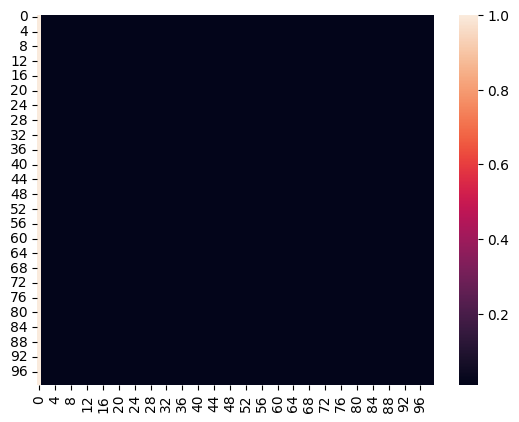

In [116]:
#reshaping the solution to a matrix
x = res.x
# reshape x so that i

In [148]:
p  = 2
# The problem we wish to solve is find matrix N that minimizes A * (N^T @ N) with the condition that the diagonal of N is all 1
# We can do this by solving the following linear system
# min (A_vec.T @ np.flatten(N^TN)) s.t. np.diag(N) = 1

#flatten A to a vector
A_copy = A.copy()
np.fill_diagonal(A_copy,1000)
A_vec = -A_copy.flatten()
diag_condition = np.ones((A.shape[0]))

A_eq = np.zeros((A.shape[0], A.shape[0]**2))

for i in range(A.shape[0]):
    A_eq[i, i*A.shape[0] + i] = 1.0

from scipy.optimize import linprog
res = linprog(A_vec, A_eq=A_eq, b_eq=diag_condition)

In [149]:
res.x.reshape((A.shape[0],A.shape[0]))

AttributeError: 'NoneType' object has no attribute 'reshape'

In [135]:
A_vec

array([1000.,    1.,    1., ...,    0.,    0., 1000.])